# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICE'] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[2**9, 2**8, 2**7]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 35
BATCH_SIZE = 256
OPTIMIZER = [
    keras.optimizers.Adam,
    keras.optimizers.Adagrad,
    keras.optimizers.RMSprop,
    keras.optimizers.SGD,
]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {lr:.4f}, Optimizer = {opt}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=lr))
    
    model.fit(x_train, 
              y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-lr-{lr}-optimizer-{opt}"
    results[exp_name_tag] = {'train_loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}

W0717 01:14:23.027424 14276 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 01:14:23.028424 14276 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 01:14:23.045429 14276 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 01:14:23.046418 14276 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 01:14:23.049417 14276 depr

Experiment with LR = 0.1000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 01:14:23.245371 14276 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 4s 85us/step - loss: 14.4466 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/35
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/35
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/35
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/35
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/35
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/35
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/35
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/35
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/35
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/35
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/35
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.1000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________________________________

50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/35
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/35
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/35
50000/50000 [============

Epoch 20/35
50000/50000 [==============================] - 3s 51us/step - loss: 1.3388 - acc: 0.5288 - val_loss: 1.4562 - val_acc: 0.4875
Epoch 21/35
50000/50000 [==============================] - 2s 50us/step - loss: 1.3300 - acc: 0.5330 - val_loss: 1.4401 - val_acc: 0.4943
Epoch 22/35
50000/50000 [==============================] - 3s 51us/step - loss: 1.3160 - acc: 0.5366 - val_loss: 1.4223 - val_acc: 0.5052
Epoch 23/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.3104 - acc: 0.5379 - val_loss: 1.4195 - val_acc: 0.5001
Epoch 24/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.2979 - acc: 0.5441 - val_loss: 1.4403 - val_acc: 0.4849
Epoch 25/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.2882 - acc: 0.5475 - val_loss: 1.4136 - val_acc: 0.5030
Epoch 26/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.2809 - acc: 0.5497 - val_loss: 1.4242 - val_acc: 0.4967
Epoch 27/35
50000/50000 [=========

Experiment with LR = 0.0100, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35

50000/50000 [==============================] - 3s 54us/step - loss: 1.3707 - acc: 0.5119 - val_loss: 1.4677 - val_acc: 0.4708
Epoch 10/35
50000/50000 [==============================] - 3s 54us/step - loss: 1.3431 - acc: 0.5224 - val_loss: 1.4306 - val_acc: 0.4960
Epoch 11/35
50000/50000 [==============================] - 3s 54us/step - loss: 1.3208 - acc: 0.5302 - val_loss: 1.4265 - val_acc: 0.4951
Epoch 12/35
50000/50000 [==============================] - 3s 53us/step - loss: 1.2978 - acc: 0.5401 - val_loss: 1.4093 - val_acc: 0.5023
Epoch 13/35
50000/50000 [==============================] - 3s 54us/step - loss: 1.2635 - acc: 0.5509 - val_loss: 1.4314 - val_acc: 0.4928
Epoch 14/35
50000/50000 [==============================] - 3s 54us/step - loss: 1.2419 - acc: 0.5559 - val_loss: 1.4067 - val_acc: 0.5001
Epoch 15/35
50000/50000 [==============================] - 3s 54us/step - loss: 1.2291 - acc: 0.5643 - val_loss: 1.3753 - val_acc: 0.5177
Epoch 16/35
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 1.3940 - acc: 0.5131 - val_loss: 1.4587 - val_acc: 0.4850
Epoch 26/35
50000/50000 [==============================] - 3s 51us/step - loss: 1.3865 - acc: 0.5170 - val_loss: 1.4564 - val_acc: 0.4841
Epoch 27/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.3799 - acc: 0.5186 - val_loss: 1.4704 - val_acc: 0.4828
Epoch 28/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.3742 - acc: 0.5225 - val_loss: 1.4349 - val_acc: 0.4936
Epoch 29/35
50000/50000 [==============================] - 2s 50us/step - loss: 1.3668 - acc: 0.5237 - val_loss: 1.4693 - val_acc: 0.4810
Epoch 30/35
50000/50000 [==============================] - 3s 50us/step - loss: 1.3613 - acc: 0.5255 - val_loss: 1.4255 - val_acc: 0.4965
Epoch 31/35
50000/50000 [==============================] - 3s 51us/step - loss: 1.3548 - acc: 0.5277 - val_loss: 1.4229 - val_acc: 0.4965
Epoch 32/35
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 3s 52us/step - loss: 2.2671 - acc: 0.1467 - val_loss: 2.2252 - val_acc: 0.1918
Epoch 2/35
50000/50000 [==============================] - 2s 47us/step - loss: 2.1959 - acc: 0.2124 - val_loss: 2.1658 - val_acc: 0.2340
Epoch 3/35
50000/50000 [==============================] - 2s 47us/step - loss: 2.1380 - acc: 0.2507 - val_loss: 2.1117 - val_acc: 0.2598
Epoch 4/35
50000/50000 [==============================] - 2s 47us/step - loss: 2.0891 - acc: 0.2700 - val_loss: 2.0683 - val_acc: 0.2779
Epoch 5/35
50000/50000 [==============================] - 2s 47us/step - loss: 2.0498 - acc: 0.2828 - val_loss: 2.0332 - val_acc: 0.2916
Epoch 6/35
50000/50000 [==============================] - 2s 46us/step - loss: 2.0176 - acc: 0.2937 - val_loss: 2.0035 - val_acc: 0.2988
Epoch 7/35
50000/50000 [==============================] - 2s 46us/step - loss: 1.9898 - acc: 0.3018 - val_loss: 1.9771 - val_acc

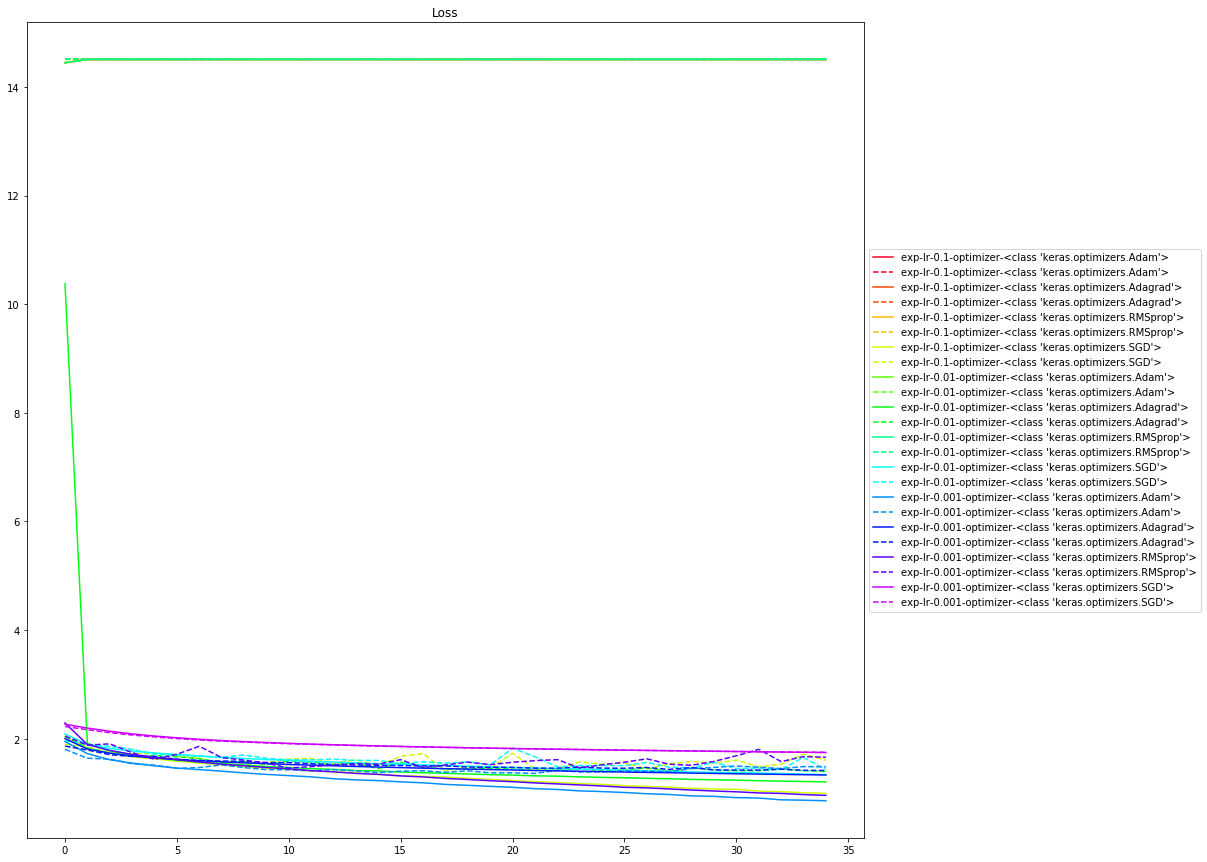

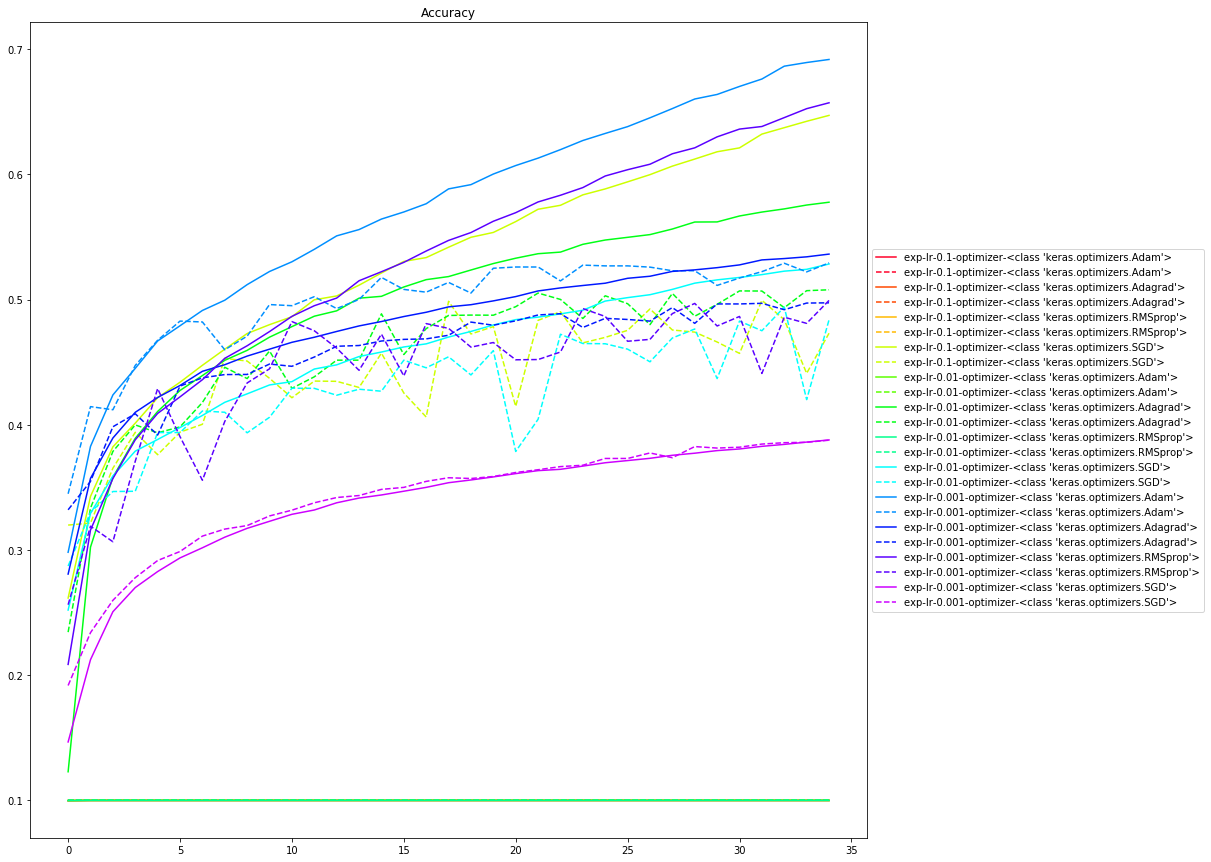

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(15, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(15, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()